In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config #file with client_id and secret for the Spotify API
import spotipy
from IPython.display import IFrame

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    kmeans = KMeans()  # Equivalent to setting n_init=10 (default)

In [2]:
#reading df with Spotify songs extracted with API (based on 1800-1900 songs)
df=pd.read_csv("https://raw.githubusercontent.com/okravtsova123/SongRecommendationML-k-means-/main/songs_with_AF.csv")
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id, client_secret= config.client_secret))

In [3]:
#dropping columns for analysis
columns_to_drop=['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
X=df.drop(columns_to_drop, axis=1)
# setting indexes as IDs - convinient for scaling
X.set_index("id", inplace=True)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
7gaA3wERFkFkgivjwbSvkG,0.788,0.758,1,-6.513,1,0.0505,0.1980,0.000085,0.1040,0.8230,119.008
6tNQ70jh4OwmPGpYy6R2o9,0.472,0.471,10,-5.692,1,0.0603,0.1510,0.000000,0.1400,0.2190,105.029
3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.8440,111.018
4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.6060,104.983
17phhZDn6oGtzMe56NuWvj,0.561,0.604,9,-4.409,1,0.0337,0.1990,0.000019,0.1040,0.2420,159.920
...,...,...,...,...,...,...,...,...,...,...,...
13XMz3rpVYITzjFIsSYlZ1,0.567,0.828,10,-4.513,1,0.0819,0.2100,0.000000,0.0928,0.8450,170.055
06Pfxmp9TtC2H00apclouT,0.388,0.145,9,-19.697,0,0.0318,0.9780,0.000007,0.0997,0.0911,75.474
2xGO2UjzxeVQSIkyg98vck,0.296,0.421,7,-8.891,1,0.0285,0.2140,0.000000,0.2320,0.3350,83.425


In [4]:
#scaling
scaler=StandardScaler()
scaler.fit(X)
IDs=X.index
X_scaled=pd.DataFrame(scaler.transform(X))
X_scaled=X_scaled.set_index(IDs)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10
id,,,,,,,,,,,
7gaA3wERFkFkgivjwbSvkG,0.998640,0.502897,-1.190730,0.362897,0.799275,-0.360831,-0.227186,-0.437457,-0.538892,1.178730,-0.073458
6tNQ70jh4OwmPGpYy6R2o9,-1.052682,-0.678164,1.298857,0.556470,0.799275,-0.235337,-0.376926,-0.437789,-0.281356,-1.313917,-0.604035
3rUGC1vUpkDG9CZFHMur1t,0.751962,0.400017,0.192374,1.148745,-1.251134,-0.599013,-0.042401,-0.437789,-0.467354,1.265395,-0.376720
4xhsWYTOGcal8zt0J161CU,2.004826,-0.320142,-0.914109,0.740613,0.799275,-0.280156,-0.849721,-0.437781,-0.612576,0.283193,-0.605781
17phhZDn6oGtzMe56NuWvj,-0.474936,-0.130843,1.022236,0.858973,0.799275,-0.575963,-0.224000,-0.437715,-0.538892,-1.218998,1.479370
...,...,...,...,...,...,...,...,...,...,...,...
13XMz3rpVYITzjFIsSYlZ1,-0.435987,0.790960,1.298857,0.834453,0.799275,0.041262,-0.188955,-0.437789,-0.619015,1.269522,1.864047
06Pfxmp9TtC2H00apclouT,-1.597970,-2.019718,1.022236,-2.745601,-1.251134,-0.600294,2.257856,-0.437762,-0.569654,-1.841747,-1.725804
2xGO2UjzxeVQSIkyg98vck,-2.195190,-0.883924,0.468995,-0.197784,0.799275,-0.642552,-0.176211,-0.437789,0.376794,-0.835196,-1.424021


In [5]:
#training model for clustering
kmeans = KMeans(n_clusters=21, random_state=42)
kmeans.fit(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=21, random_state=42)

In [6]:
#identifying clusters
clusters = kmeans.predict(X_scaled)
clusters_df=pd.DataFrame(clusters).value_counts().sort_index()
clusters_df

0     109
1      70
2      93
3     134
4     111
5      98
6     115
7     104
8      62
9      70
10     99
11    128
12     65
13     83
14     93
15     67
16     38
17    129
18     58
19     79
20     60
Name: count, dtype: int64

In [7]:
#checking inertia
kmeans.inertia_

7973.337299215047

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

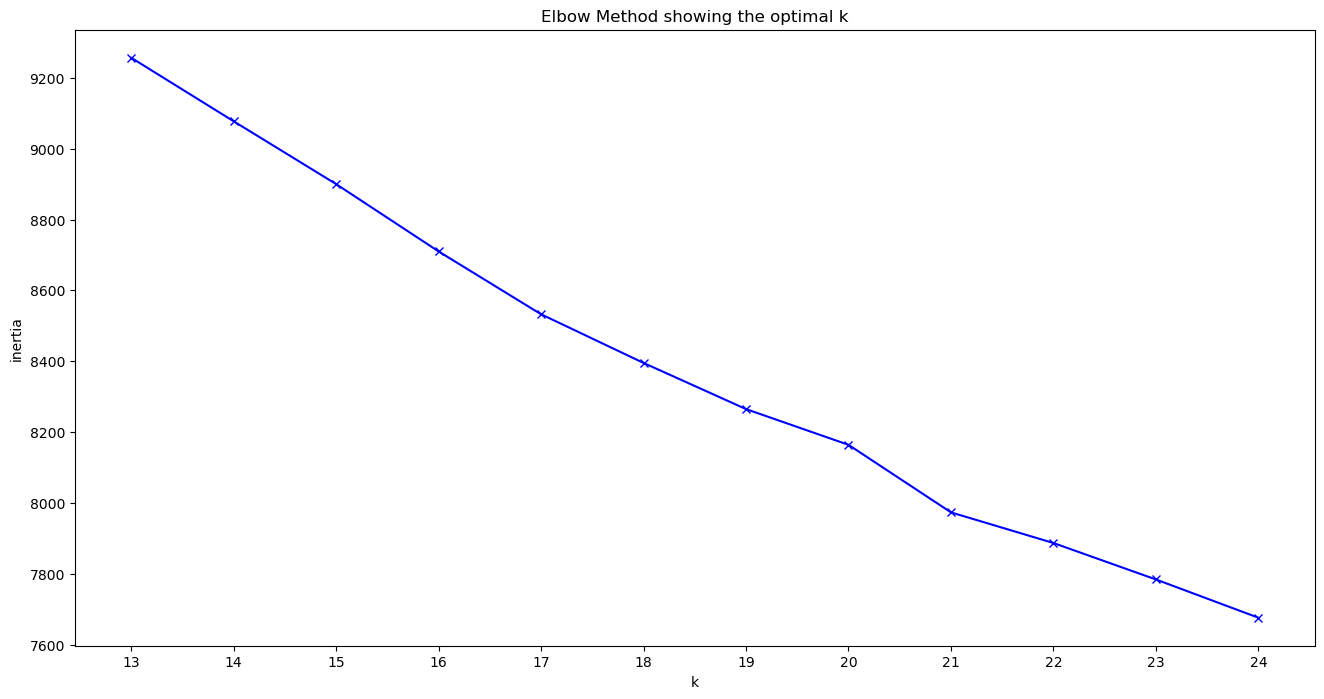

In [8]:
#choosing optimal k using lebow method
K = range(13, 25)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

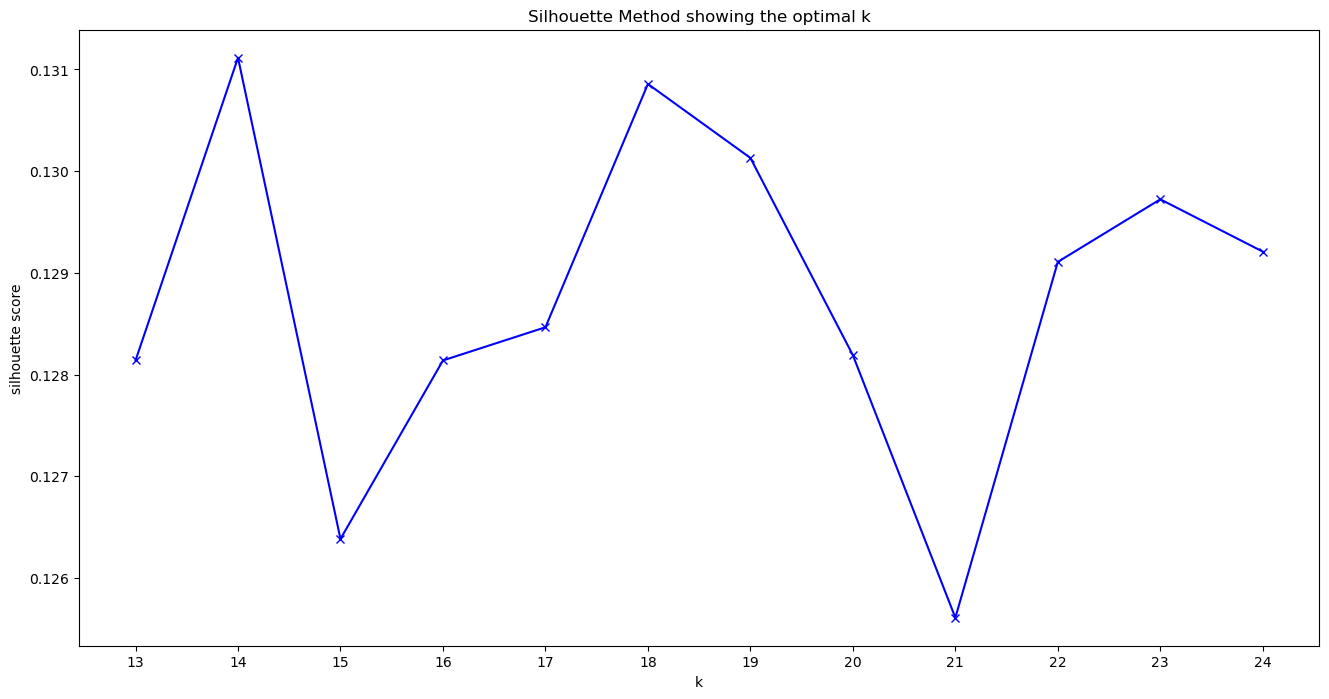

In [9]:
K = range(13, 25)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [19]:
#adding clusters
clusters=kmeans.predict(X_scaled)
X_scaled_w_clusters=X_scaled
X_scaled_w_clusters['cluster']=clusters

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [15]:
#all in functions

def user_input():
    song_input=input("input your favourite song:")
    song_input=song_input.lower()
    return search_spotify(song_input)

def search_spotify(song):
    song_name=song
    result=sp.search(q=song_name,type="track",market="GB")
    song_id=result['tracks']['items'][0]['id']
    return extracting_AF(song_id)

def extracting_AF(song_id):
    song_af=pd.DataFrame(sp.audio_features(song_id))
    song_af=song_af.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
    song_af=song_af.set_index("id")
    return scaling_transform(song_af)

def scaling_transform(df):
    ids=df.index
    scaled_df=pd.DataFrame(scaler.transform(df), columns=df.columns)
    scaled_df=scaled_df.set_index(ids)
    return recomendation(scaled_df)

def recomendation(scaled_df):
    #getting the cluster
    cluster_for_rec=kmeans.predict(scaled_df)[0]
    #checking df with this cluster and extracting sample
    recomended_song=X_scaled_w_clusters[X_scaled_w_clusters['cluster']==cluster_for_rec].sample()
    recomended_song_id=recomended_song.index[0]
    #playing recommended song
    recomended_song_id = str(recomended_song_id)
    return IFrame(src="https://open.spotify.com/embed/track/"+recomended_song_id,
                 width="320", height="80", frameborder="0",allowtransparency="true",allow="encrypted-media")

In [18]:
user_input()

input your favourite song:in the end


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [20]:
X_scaled_w_clusters

,0,1,2,3,4,5,6,7,8,9,10,cluster
id,,,,,,,,,,,,
7gaA3wERFkFkgivjwbSvkG,0.998640,0.502897,-1.190730,0.362897,0.799275,-0.360831,-0.227186,-0.437457,-0.538892,1.178730,-0.073458,13
6tNQ70jh4OwmPGpYy6R2o9,-1.052682,-0.678164,1.298857,0.556470,0.799275,-0.235337,-0.376926,-0.437789,-0.281356,-1.313917,-0.604035,21
3rUGC1vUpkDG9CZFHMur1t,0.751962,0.400017,0.192374,1.148745,-1.251134,-0.599013,-0.042401,-0.437789,-0.467354,1.265395,-0.376720,2
4xhsWYTOGcal8zt0J161CU,2.004826,-0.320142,-0.914109,0.740613,0.799275,-0.280156,-0.849721,-0.437781,-0.612576,0.283193,-0.605781,13
17phhZDn6oGtzMe56NuWvj,-0.474936,-0.130843,1.022236,0.858973,0.799275,-0.575963,-0.224000,-0.437715,-0.538892,-1.218998,1.479370,16
...,...,...,...,...,...,...,...,...,...,...,...,...
13XMz3rpVYITzjFIsSYlZ1,-0.435987,0.790960,1.298857,0.834453,0.799275,0.041262,-0.188955,-0.437789,-0.619015,1.269522,1.864047,16
06Pfxmp9TtC2H00apclouT,-1.597970,-2.019718,1.022236,-2.745601,-1.251134,-0.600294,2.257856,-0.437762,-0.569654,-1.841747,-1.725804,1
2xGO2UjzxeVQSIkyg98vck,-2.195190,-0.883924,0.468995,-0.197784,0.799275,-0.642552,-0.176211,-0.437789,0.376794,-0.835196,-1.424021,21


In [21]:
song_name="numb"
result=sp.search(q=song_name,type="track",market="GB")
song_id=result['tracks']['items'][0]['id']
song_id

'2nLtzopw4rPReszdYBJU6h'

In [22]:
song_af=pd.DataFrame(sp.audio_features("2nLtzopw4rPReszdYBJU6h"))
song_af=song_af.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
song_af=song_af.set_index("id")
song_af

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
2nLtzopw4rPReszdYBJU6h,0.496,0.863,9,-4.153,1,0.0381,0.0046,0,0.639,0.243,110.018


In [30]:

ids=song_af.index
ids
scaled_df=pd.DataFrame(scaler.transform(song_af), columns=song_af.columns)
scaled_df=scaled_df.set_index(ids)
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
2nLtzopw4rPReszdYBJU6h,-0.896885,0.934992,1.022236,0.919333,0.799275,-0.519619,-0.843349,-0.437789,3.288389,-1.214871,-0.414676


In [ ]:
cluster_for_rec=kmeans.predict(scaled_df)[0]
#checking df with this cluster and extracting sample
recomended_song=X_scaled_w_clusters[X_scaled_w_clusters['cluster']==cluster_for_rec].sample()
recomended_song_id=recomended_song.index[0]
#playing recommended song
recomended_song_id = str(recomended_song_id)
IFrame(src="https://open.spotify.com/embed/track/"+recomended_song_id,
                 width="320", height="80", frameborder="0",allowtransparency="true",allow="encrypted-media")

In [32]:
cluster_for_rec=kmeans.predict(scaled_df)[0]
cluster_for_rec

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


23

In [37]:
recomended_song=X_scaled_w_clusters[X_scaled_w_clusters['cluster']==cluster_for_rec].sample()
recomended_song

,0,1,2,3,4,5,6,7,8,9,10,cluster
id,,,,,,,,,,,,
0DUyHDBRaxFiXDf6Jhh4JD,-0.1958,-0.567054,-0.914109,-0.436863,0.799275,-0.011241,1.356232,-0.434718,2.494318,0.807309,-0.943051,23


In [38]:
recomended_song_id=recomended_song.index[0]
recomended_song_id

'0DUyHDBRaxFiXDf6Jhh4JD'

In [39]:
IFrame(src="https://open.spotify.com/embed/track/"+recomended_song_id,
                 width="320", height="80", frameborder="0",allowtransparency="true",allow="encrypted-media")